# Summary of Mortality Rates for various Medical Procedures in Californian Hospitals

Spring 2025 Data Science Project

Franciszek Pajak, Aashrit Sabbani, Achyutha Duddebanda

Contributions:
Every group member tackled a bespoke problem of their choice. Their unique problems are listed below.

## Introduction
Each year in the United States, over 50 million surgical procedures are conducted to treat a variety of diseases, ranging from stroke to heart disease. Many of these diseases are fatal if left alone — note that heart disease causes approximately 1 out of 5 deaths in the United States each year. Therefore, focusing on improving the success of these surgical procedures is critical for improving social welfare and overall Quality of Life.

A significant factor that characterizes the success of a particular surgery is its **mortality rate**, or how many deaths it causes each year on average. In general, hospitals have an incentive to minimize mortality rates as much as possible, not only to reduce patient death rates but to increase their own **quality rating** (a qualitative assessment of the services the hospital provides, including surgery) and attract more patients into their network. Hence, understanding trends (over time) in mortality rates and quality ratings for specific surgical procedures in hospitals is crucial for the medical industry (to learn where to focus efforts in reducing death rates) and for hospitals (to know which procedures might require targeted improvement, which will increase their quality rating).

In this tutorial, we attempt to address these themes. We specifically analyze hospitals in the state of California -- being the most populous and one of the largest geographically, states in the U.S. which conducts the most surgical procedures, California serves as a representative sample which might hint to overall surgical and hospital trends in the United States as a whole.

We would like to answer, to the best extent, the following questions:
1. Does geographical location affect the quality rating for a hospital or mortality rate for a specific procedure?
2. Do different hospitals in different years receive higher or lower quality ratings depending on the mortality rate that year as well as other factors, such as the population they serve?
3. Have performance rates decreased over time? What are the general trends for the procedure success rate across all hospitals, or a specific hospital?

These questions will mainly be tackled in the **Machine Learning** section.

Answering the questions above is important because by looking at the patterns in healthcare outcomes, we can imporove healthcare policy. In order to ensure equitable health outcomes across regions, policymakers should make data driven decisions when distributing resources. Additionally, if certain regions have sucessful medical practices that benefit patient outcomes those practices can be investigated to benefit the population. Narrowly examining procedural effectiveness on a granular level can inform patients on areas with the best outcomes and guide them when seeking care.

Along the way, we will explain the steps we took in the data science life cycle, and the steps necessary to performing successful data analysis.


# Imports

The imports below will be used for data preprocessing and for building prediction models. We will utilize Pandas and Numpy primarily for examining and cleaning our dataset. We will also make extensive use of Scikit-learn to create the machine learning models we will be using and for further data analysis. Finally, we will use visualization libraries like Seaborn and Matplotlib to visualize our data.

We also use the wget Colab command to download the datasets we used into our repository.

In [78]:
!wget https://raw.githubusercontent.com/sabba8986/CMSC320FinalProject/refs/heads/main/mortrates.csv
!wget https://raw.githubusercontent.com/sabba8986/CMSC320FinalProject/refs/heads/main/cabgs11-18.csv
!wget https://raw.githubusercontent.com/sabba8986/CMSC320FinalProject/refs/heads/main/cabgs18-22.csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import time
import requests
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.neural_network import MLPClassifier


--2025-05-14 10:55:42--  https://raw.githubusercontent.com/sabba8986/CMSC320FinalProject/refs/heads/main/mortrates.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6420523 (6.1M) [text/plain]
Saving to: ‘mortrates.csv.3’

mortrates.csv.3     100%[===================>]   6.12M  --.-KB/s    in 0.02s   

2025-05-14 10:55:42 (279 MB/s) - ‘mortrates.csv.3’ saved [6420523/6420523]

--2025-05-14 10:55:42--  https://raw.githubusercontent.com/sabba8986/CMSC320FinalProject/refs/heads/main/cabgs11-18.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 2

# Data Exploration and Summary
## About the dataset (mortrates.csv)

The primary dataset that we are exploring, mortrates.csv, consists of inpatient mortality data in the state of California after treatment
of various diseases, including stroke and heart failure. We are trying to investigate various
procedures such as pancreatic resection and understand how common they are as well as their
mortality rates, in order to assess surgeon performance over time. Analyzing trends in the
mortality rates will allow us to understand the future implications technology will have in the
medical field, by allowing us to determine the efficacy of current medical techniques in curing
such diseases/illnesses.

## Conclusion 1

In [79]:
path = "mortrates.csv"
df = pd.read_csv(path)
rating_map = {'As Expected': 1, 'Worse': 0, 'Better': 2}      #map to be used to change hospital ratings from string to number for classification

df.head(22)

,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
0,2016,AAAA,STATEWIDE,NaN,AAA Repair Unruptured,1.3,30,2358,NaN,NaN,NaN
1,2016,AAAA,STATEWIDE,NaN,AMI,6.1,3178,52167,NaN,NaN,NaN
2,2016,AAAA,STATEWIDE,NaN,Acute Stroke,9.1,5482,60184,NaN,NaN,NaN
3,2016,AAAA,STATEWIDE,NaN,Acute Stroke Hemorrhagic,21.1,2580,12210,NaN,NaN,NaN
4,2016,AAAA,STATEWIDE,NaN,Acute Stroke Ischemic,5,2258,45141,NaN,NaN,NaN
5,2016,AAAA,STATEWIDE,NaN,Acute Stroke Subarachnoid,22.7,644,2833,NaN,NaN,NaN
6,2016,AAAA,STATEWIDE,NaN,Carotid Endarterectomy,0.5,25,4894,NaN,NaN,NaN
7,2016,AAAA,STATEWIDE,NaN,Espophageal Resection,3.9,11,281,NaN,NaN,NaN
8,2016,AAAA,STATEWIDE,NaN,GI Hemorrhage,2.6,1412,54011,NaN,NaN,NaN
9,2016,AAAA,STATEWIDE,NaN,Heart Failure,2.9,2763,95205,NaN,NaN,NaN


In the data above I will take care to filter out the outliers in order to perform a good exploratory data analysis. I will study how different procedures have higher risk mortality. Also I can see that the data above has approximately fifty thousand rows. The different features of the dataset such as the columns which are important are the risk adjusted mortality and the procedure/conditions. The other columns in the future could be used to perform a linear regression. Some procedures/conditions are a lot more rare than others. For example conditions such as stroke are quite common and are over represented in the database.

As can be seen above, Our dataset has 57652 rows.

In [80]:
df['# of Cases'] = pd.to_numeric(df['# of Cases'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['Risk Adjuested Mortality Rate'] = pd.to_numeric(df['Risk Adjuested Mortality Rate'], errors='coerce')

df['# of Cases'] = df['# of Cases'].replace('.', 128.3).fillna(128.3).astype(int)    #The number 128.3 was previously calculated

# Eliminate all outliers

print("Mean # of Cases per procedure per hospital:", df['# of Cases'].mean())

Mean # of Cases per procedure per hospital: 244.60942866063067


Below, I wanted to study whether or not Certain hospitals had mortality rates that were on average higher than other hospitals. First I wanted to take a look at the general distribution of mortlaity rates.

            Procedure_Condition  Risk_Adjusted_Mortality_Rate
0         AAA Repair Unruptured                           1.3
1                           AMI                           6.1
2                  Acute Stroke                           9.1
3      Acute Stroke Hemorrhagic                          21.1
4         Acute Stroke Ischemic                           5.0
...                         ...                           ...
57648             GI Hemorrhage                           2.5
57649             Heart Failure                           3.6
57650              Hip Fracture                           4.0
57651                       PCI                           4.3
57653                 Pneumonia                          11.9

[36274 rows x 2 columns]
Mean mortality rate: 5.989289849478966


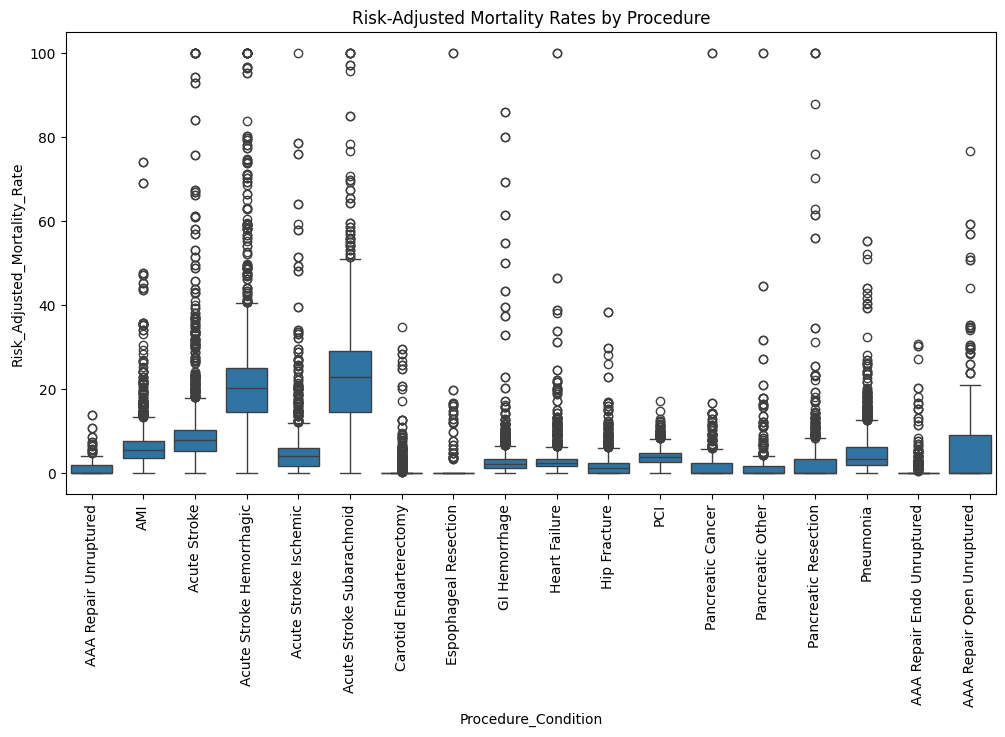

In [81]:
df_clean = df.dropna(subset=['Procedure/Condition', 'Risk Adjuested Mortality Rate']).copy()
#df_clean = df_clean[(df_clean['Risk Adjuested Mortality Rate'] >= df_clean['Risk Adjuested Mortality Rate'].quantile(0.25) -
#         1.5 * (df_clean['Risk Adjuested Mortality Rate'].quantile(0.75) - df_clean['Risk Adjuested Mortality Rate'].quantile(0.25))) &
#        (df_clean['Risk Adjuested Mortality Rate'] <= df_clean['Risk Adjuested Mortality Rate'].quantile(0.75) +
#         1.5 * (df_clean['Risk Adjuested Mortality Rate'].quantile(0.75) - df_clean['Risk Adjuested Mortality Rate'].quantile(0.25)))]
#Cleaning outliers made my data worse.
custom_frame = pd.DataFrame({
    "Procedure_Condition": df_clean['Procedure/Condition'],
    "Risk_Adjusted_Mortality_Rate": df_clean['Risk Adjuested Mortality Rate']
})

print(custom_frame)
mortal = custom_frame['Risk_Adjusted_Mortality_Rate'].mean()
print("Mean mortality rate:", mortal)

grouped_by_procedure = custom_frame.groupby("Procedure_Condition")["Risk_Adjusted_Mortality_Rate"].agg(
    ['count', 'mean', 'std']
).reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(data=custom_frame, x="Procedure_Condition", y="Risk_Adjusted_Mortality_Rate")
plt.xticks(rotation=90)
plt.title("Risk-Adjusted Mortality Rates by Procedure")
plt.show()

After looking at the graph above, I realized mortality rates are highly dependent on the procedure and even then their vairances are quite high. Nevertheless, I decided to create an average mortality rate for each hospital. Ultimately, it seemed to me from a visual inspection that the rates were distributed quite randomly. The mortalities seem to vary randomly about the mean.

Mean Adjusted Mortality Rate:  5.989289849478967


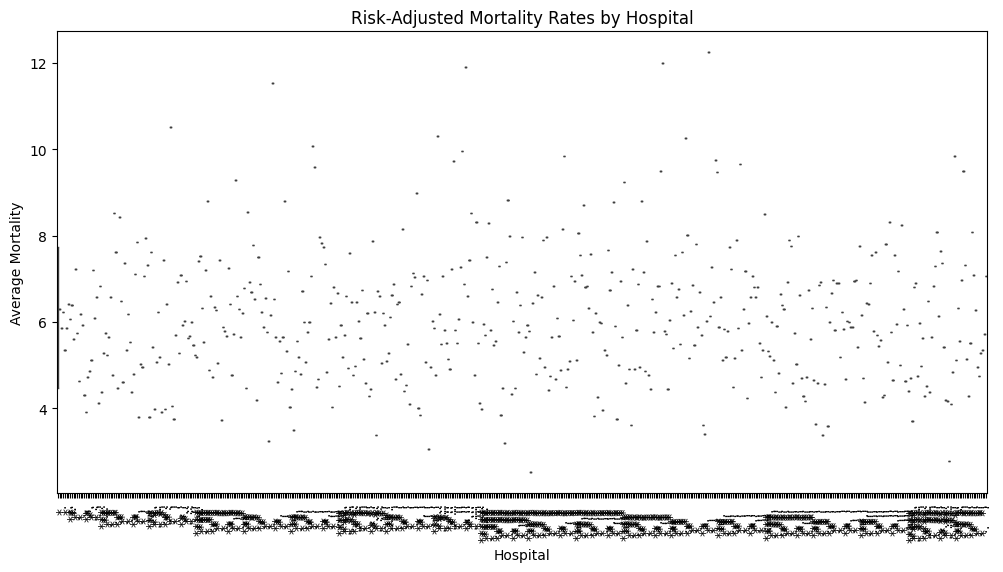

In [82]:
path = "mortrates.csv"
df_investigate_hospital_mortality = pd.read_csv(path)
dihm = df_investigate_hospital_mortality
dihm.replace('.', np.nan, inplace=True)
df_investigate_hospital_mortality['Risk Adjuested Mortality Rate'] = df_investigate_hospital_mortality['Risk Adjuested Mortality Rate'].astype(float)
mean_mortality = df_investigate_hospital_mortality['Risk Adjuested Mortality Rate'].mean()
print("Mean Adjusted Mortality Rate: ", mean_mortality)
dihm['Risk Adjuested Mortality Rate'] = dihm['Risk Adjuested Mortality Rate'].replace('.', mean_mortality).fillna(mean_mortality).astype(float)

hospitals = dihm.groupby('HOSPITAL')
list_of_hospitals_and_avg_mort = list()
to_plot = list()
i = 0
name2 = " "
for name, contents in hospitals:
  list_of_hospitals_and_avg_mort.append([name, contents['Risk Adjuested Mortality Rate'].mean()])
  to_plot.append([name2, contents['Risk Adjuested Mortality Rate'].mean()])
  new_name = ""
  j = i
  while not (j/3 == 0):
    if j%3 == 1:
      new_name += " "
    elif j%3 == 2:
      new_name += "."
    else:
      new_name += "*"
    j = j//3
  name2 = new_name
  i += 1
hospit_df = pd.DataFrame(to_plot, columns=['Hospital', 'Average Mortality'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=hospit_df, x="Hospital", y="Average Mortality")
plt.xticks(rotation=90)
plt.title("Risk-Adjusted Mortality Rates by Hospital")
plt.show()

## Conclusion 2

In [83]:
# Fill in the missing data points with the estimated mean (10)
df['# of Deaths'] = df['# of Deaths'].replace('.', 10).fillna(10).astype(int)

# Eliminate all outliers
df = df[(df["# of Deaths"] >= df["# of Deaths"].quantile(0.25) -
         1.5 * (df["# of Deaths"].quantile(0.75) - df["# of Deaths"].quantile(0.25))) &
        (df["# of Deaths"] <= df["# of Deaths"].quantile(0.75) +
         1.5 * (df["# of Deaths"].quantile(0.75) - df["# of Deaths"].quantile(0.25)))]

mean = df['# of Deaths'].mean()
print(f"OVERALL MEAN: {mean}")
df

OVERALL MEAN: 6.789885422240263


,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
7,2016,AAAA,STATEWIDE,NaN,Espophageal Resection,3.9,11,281,NaN,NaN,NaN
12,2016,AAAA,STATEWIDE,NaN,Pancreatic Cancer,2.0,20,1021,NaN,NaN,NaN
16,2016,Alameda,Alameda Hospital,106010735.0,AAA Repair Unruptured,NaN,10,128,NaN,-122.253991,37.76266
17,2016,Alameda,Alameda Hospital,106010735.0,AMI,16.1,3,17,As Expected,-122.253991,37.76266
18,2016,Alameda,Alameda Hospital,106010735.0,Acute Stroke,23.6,9,74,Worse,-122.253991,37.76266
...,...,...,...,...,...,...,...,...,...,...,...
57647,2022,Yuba,Adventist Health and Rideout,106580996.0,Carotid Endarterectomy,0.0,0,23,As Expected,-121.593602,39.138805
57648,2022,Yuba,Adventist Health and Rideout,106580996.0,GI Hemorrhage,2.5,6,247,As Expected,-121.593602,39.138805
57650,2022,Yuba,Adventist Health and Rideout,106580996.0,Hip Fracture,4.0,6,167,As Expected,-121.593602,39.138805
57651,2022,Yuba,Adventist Health and Rideout,106580996.0,PCI,4.3,7,146,As Expected,-121.593602,39.138805


In the above plots we see a large variance between the mortalities in each of the procedures. The two types of acute stroke clearly carry the highest mortality rates though. In the future correlation could be investigated because the strokes seem to be correlated.

In [84]:
d = df['# of Deaths'].mean()
d2 = df[df['Procedure/Condition']=='Heart Failure']['# of Deaths'].mean()
print(f"Overall mean deaths: {d}") # overall deaths avg (around 14)
print(f"Mean deaths due to Heart Failure: {d2}") # Find the mean death rate of the "Heart Failure" procedure

Overall mean deaths: 6.789885422240263
Mean deaths due to Heart Failure: 7.253761574074074


We want to find whether the total number of inpatient deaths in California's hospitals caused by a "Heart Failure" procedure is the same as the overall mean death rate for all procedures with $\alpha = 0.05$.
$ \\ H_0: \mu = 7$
$ \\ H_a: \mu > 7$


In [85]:
# Gets the column of deaths due to Heart Failure
deaths = df[df['Procedure/Condition']=='Heart Failure']['# of Deaths']

# The overall mean here is approximately 7 (6.789)
pop_mean = 7

t_statistic, p_value = stats.ttest_1samp(a=deaths, popmean=pop_mean, alternative='greater')
print("P-value:", p_value)

P-value: 0.00685113860015079


Since $p \approx 0.007 < 0.05$, we reject $H_0$ and claim that the total number of inpatient deaths in California's hospitals caused by a "Heart Failure" procedure is significantly greater than the overall average of deaths ($7$).

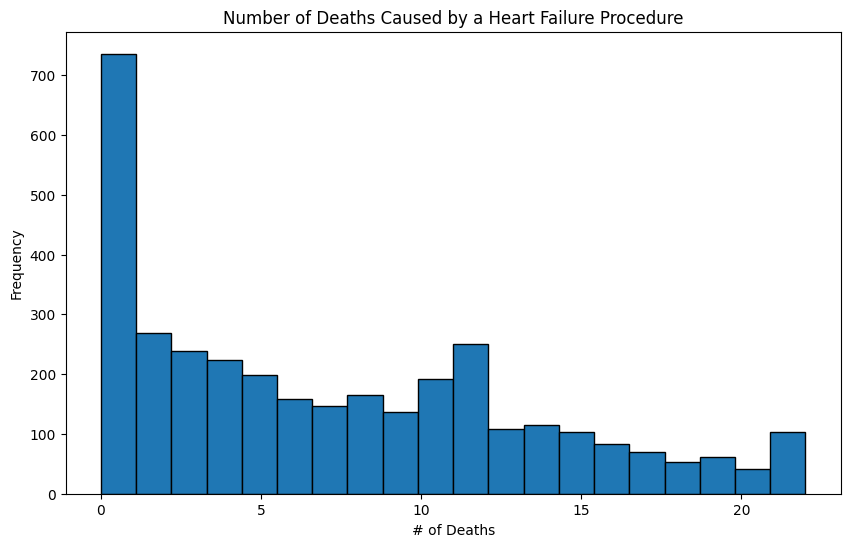

In [86]:
# Data visualization
plt.figure(figsize=(10, 6))
plt.hist(df[df['Procedure/Condition']=='Heart Failure']['# of Deaths'], bins=20, edgecolor='black')
plt.title('Number of Deaths Caused by a Heart Failure Procedure')
plt.xlabel('# of Deaths')
plt.ylabel('Frequency')
plt.show()

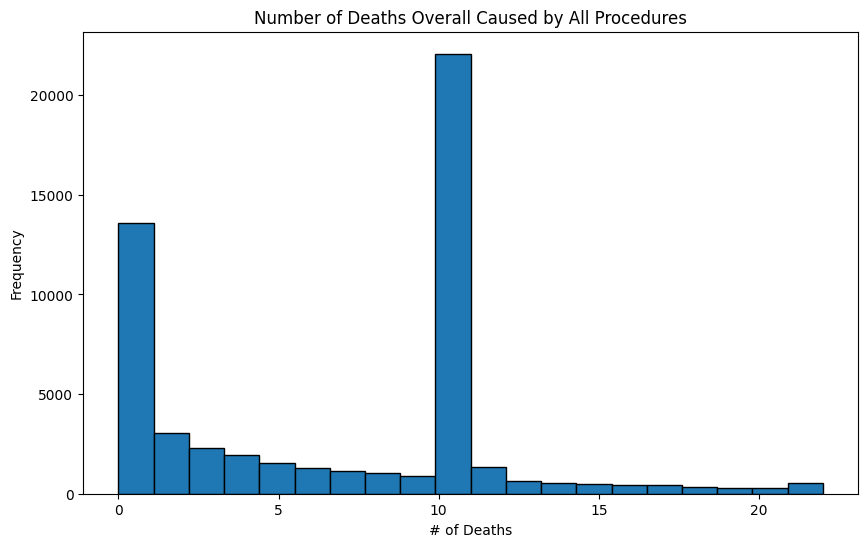

In [87]:
# Data visualization
plt.figure(figsize=(10, 6))
plt.hist(df['# of Deaths'], bins=20, edgecolor='black')
plt.title('Number of Deaths Overall Caused by All Procedures')
plt.xlabel('# of Deaths')
plt.ylabel('Frequency')
plt.show()

### Histogram analysis
From the second histogram, we can see that the most common number of patient deaths due to hospital procedures is $10$ by a large margin. Additionally, from the first histogram, we can see that the distribution of the number of deaths has more spread than the second histogram.

In [88]:
# Calculate the mean of all entries that are not '.' or 'NaN'
wrong_mean = pd.to_numeric(df['# of Deaths'], errors='coerce').mean()
print(f"MEAN WITH OUTLIERS: {wrong_mean}")

MEAN WITH OUTLIERS: 6.789885422240263


In [89]:
df['HOSPITAL'].value_counts()

,count
HOSPITAL,
Marshall Medical Center,180
Kern Medical Center,180
Sutter Delta Medical Center,180
Contra Costa Regional Medical Center,180
San Ramon Regional Medical Center,180
...,...
Kaiser Foundation Hospital – Los Angeles,8
Cedars Sinai Medical Center,7
Community Regional Medical Center – Fresno,7


## Conclusion 3 - CABGS

The cabgs18-22.csv file contains a database describing various statistics regarding the impact of Coronary Artery Bypass Graft (CABG) surgery in Californian hospitals between 2018-2022.

In [91]:
cabgs_df = pd.read_csv("cabgs18-22.csv")
cabgs_df_nan = cabgs_df[cabgs_df.isna().any(axis = 1)] #Get all rows with at least one NaN value in them
display(cabgs_df_nan)

,Year,County,Hospital,Hospital ID,Performance Measure,Total Statewide CABG Cases,Total Statewide CABG Cases for Performance Measure Reporting,Statewide Adverse Events,Statewide Adverse Events Rate (%),Total Hospital CABG Cases,Total Hospital CABG Cases for Performance Measure Reporting,Hospital Adverse Events,Hospital Observed Adverse Events Rate (%),Hospital Expected Adverse Events Rate (%),"Hospital Risk-Adjusted Adverse Events Rate (%,RAAER)",Hospital Lower 95% CI for RAAER,Hospital Upper 95% CI for RAAER,Performance Rating,Longitude,Latitude
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Observe that this database only has one NaN row, so no rigorous data cleaning is required here (for now). We may remove the NaN row, and it will suffice.

In [92]:
nan_row = cabgs_df_nan.index.to_list()[0]
cabgs_df = cabgs_df.drop(index = nan_row)
cabgs_df

,Year,County,Hospital,Hospital ID,Performance Measure,Total Statewide CABG Cases,Total Statewide CABG Cases for Performance Measure Reporting,Statewide Adverse Events,Statewide Adverse Events Rate (%),Total Hospital CABG Cases,Total Hospital CABG Cases for Performance Measure Reporting,Hospital Adverse Events,Hospital Observed Adverse Events Rate (%),Hospital Expected Adverse Events Rate (%),"Hospital Risk-Adjusted Adverse Events Rate (%,RAAER)",Hospital Lower 95% CI for RAAER,Hospital Upper 95% CI for RAAER,Performance Rating,Longitude,Latitude
0,2022,Alameda,Alta Bates Summit Medical Center,106010937.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,151,130,4,3.08,3.35,2.26,0.62,5.79,Average,-122.26,37.82
1,2022,Alameda,Washington Hospital – Fremont,106010987.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,91,83,2,2.41,2.05,2.90,0.35,10.46,Average,-121.98,37.56
2,2022,Alameda,Stanford Health Care Tri-Valley,106014050.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,94,71,1,1.41,2.26,1.53,0.04,8.55,Average,-121.88,37.69
3,2022,Butte,Enloe Medical Center– Esplanade,106040962.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,127,94,4,4.26,2.93,3.57,0.97,9.13,Average,-121.85,39.74
4,2022,Contra Costa,John Muir Medical Center – Concord Campus,106071018.0,Isolated CABG Operative Mortality,"15,200","12,564",309,2.46,280,244,1,0.41,2.76,0.37,0.01,2.03,Better,-122.04,37.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2018-2019,Tulare,Kaweah Delta Medical Center,106540734.0,Isolated CABG 30-Day Readmission,"32,343","22,167","2,693",12.15,455,352,48,13.64,13.81,12.00,8.85,15.91,Average,-119.29,36.33
1457,2018-2019,Ventura,Community Memorial Hospital - San Buenaventura,106560473.0,Isolated CABG 30-Day Readmission,"32,343","22,167","2,693",12.15,170,129,9,6.98,9.99,8.48,3.88,16.10,Average,-119.26,34.27
1458,2018-2019,Ventura,Los Robles Hospital and Medical Center,106560492.0,Isolated CABG 30-Day Readmission,"32,343","22,167","2,693",12.15,165,113,19,16.81,12.33,16.57,9.98,25.87,Average,-118.89,34.21
1459,2018-2019,Ventura,St. John's Regional Medical Center,106560529.0,Isolated CABG 30-Day Readmission,"32,343","22,167","2,693",12.15,140,100,24,24.00,15.21,19.17,12.28,28.53,Worse,-119.16,34.22



The cabgs.csv database contains a column "Performance Measure" describing 4 different performance ratings for different **adverse events**:

- **Isolated CABG Operative Mortality**: The percentage of CABG surgery patients who died during/after a CABG surgery only
- **CABG+Valve Operative Mortality**: The percentage of CABG surgery patients who died during/after a CABG and heart valve surgery together
- **Isolated CABG Post-Operative Stroke**: The percentage of CABG surgery patients who suffered from stroke after a CABG surgery
- **Isolated CABG 30-day Readmission**: The percentage of CABG surgery patients who were readmitted to a hospital within 30 days of their CABG surgery

In [93]:
display(cabgs_df["Performance Measure"].value_counts())

,count
Performance Measure,
Isolated CABG 30-Day Readmission,368
CABG+Valve Operative Mortality,366
Isolated CABG Post-Operative Stroke,366
Isolated CABG Operative Mortality,361


The database then includes the following columns:

- Year: The year or year range being studied
- County: The county in which the given hospital is located
- Hospital: The name of the given hospital
- Hospital ID: The ID of the given hospital
- Total Statewide CABG Cases: The total number of CABG cases in total for that year range
- Total Statewide CABG Cases for Performance Measure Reporting: The total number of CABG cases included in the performance rating for the given performance measure for that year range
- Statewide Adverse Events: The number of occurences of the given adverse event statewide
- Statewide Adverse Events Rate (%): The percentage rate at which the adverse event occurred statewide among all CABG patients
- Similar metrics to the above, but hospital-wide instead of statewide
- Hospital Observed/Expected Adverse Events Rate (%): The actual/expected rate of the adverse event occuring for CABG surgery patients at a given hospital
- Hospital Risk-Adjusted Adverse Events Rate (%,RAAER): The above, but adjusted for risk
- Hospital Lower/Upper 95% CI for RAAER: The lower and upper bounds for the adverse event rates for hospitals within a 95% confidence interval
- Performance Rating: The performance rating for the hospital ("average," "worse," etc.)
- Longitude/Latitude: The latitude/longitude coordinates of the given hospital

A key feature of this dataset is "performance measure," which measures the risks of a variety of adverse events. The dataset also includes significant information about the geolocation of the hospitals it contains, including their latitude, longitude, and the county they are in.

Hence, it is worthwhile to study whether there is a correlation between the location of hospitals and their performance measure for certain given adverse events for CABG surgery. Knowing this will suggest whether certain locations in California are at risk for adverse events relating to the operation.

Specifically, we want to examine whether certain counties in California contain hospitals that feature higher rates for adverse events, on average, compared to other counties.

To examine this claim, we perform a one-way ANOVA test with a significance level $\alpha = 0.05$:

- $H_0$: Across major counties in California, the average rate of adverse events in the county is the same.
- $H_A$: There is at least one county in California where its average rate of adverse events across hospitals in the county is different from the averages of other counties.


However, observe:

In [94]:
display(cabgs_df["County"].value_counts())

,count
County,
Los Angeles,439
Orange,143
San Diego,106
Santa Clara,84
San Bernardino,72
Riverside,60
Sacramento,48
San Francisco,43
Ventura,37


We notice that the sample size ranges between each of the county categories varies very differently. This will make ANOVA a less effective statistical method. Therefore, when doing the grouping, we choose only counties with over 50 datapoints and discard the rest of the counties. This will ensure that our ANOVA test returns a more accurate result.

We can now proceed with performing ANOVA. First, we must convert the "Hospital Observed Adverse Events Rate (%)" into a numeric column. This column may contain invalid values when converting to a numeric column, so we treat them as NaN values, then extract them out of the final dataframe:

In [95]:
cabgs_df["Hospital Observed Adverse Events Rate (%)"] = pd.to_numeric(cabgs_df["Hospital Observed Adverse Events Rate (%)"], errors = "coerce")
cabgs_df = cabgs_df[~cabgs_df["Hospital Observed Adverse Events Rate (%)"].isna()]
cabgs_df = cabgs_df.copy() #For error suppression
cabgs_df["risk_rates"] = cabgs_df["Hospital Observed Adverse Events Rate (%)"]

cabgs_df is now updated to contain the converted numeric values in the "risk_rates" column, which is just an alias for the "Hospital Observed Adverse Events Rate (%)" column.

We now group and extract the relevant data:

In [96]:
cabgs_ca_valve = cabgs_df
ca_valve_group = cabgs_ca_valve.groupby(["County"])
county_order = []
samples = [] #These are the samples that will be passed into ANOVA
for county, county_df in ca_valve_group:
    if county_df.shape[0] < 50:
        continue
    county_order.append(county[0])
    risk_rate_list = county_df["risk_rates"].tolist()
    samples.append(risk_rate_list)
print(county_order)

['Los Angeles', 'Orange', 'Riverside', 'San Bernardino', 'San Diego', 'Santa Clara']



This groups the dataframe by county. While iterating through the group, any dataframes with less than 50 entries are discarded. The risk_rates column is then retrieved, and added to the samples list.

Before we run ANOVA, notice that the sample sizes for each county are very different. For ANOVA, this is fine, unless the samples have different variances.

To check that each sample has the same variance, we run a quick Levene test, with the following hypotheses and $\alpha = 0.05$:
- $H_0$: All county samples have the same variance
- $H_A$: At least one of the county sample has a different variance from the others

In [97]:
f_stat, pvalue_levene = stats.levene(*samples)
print("p-value: {pvalue}".format(pvalue = pvalue_levene))

p-value: 0.03820010962198781



Since the p-value is less than $\alpha = 0.05$, we accept the null hypothesis of the Levene test, and so all county samples have the same variance.

Now that we verified equal variances among the samples, we run the original ANOVA test:

In [98]:
f_stat, pvalue_anova = stats.f_oneway(*samples)
print("p-value: {pvalue}".format(pvalue = pvalue_anova))

p-value: 0.06533989753307722



Since the p-value is greater than $\alpha = 0.05$ we cannot reject the null hypothesis and accept the alternative hypothesis. Therefore there is a county in California where its average rate of adverse events across hospitals in the county is different from the averages of other counties.

We now plot, on a **box and whisker plot**, the observed adverse event rates for major counties in California:

Text(0, 0.5, 'County')

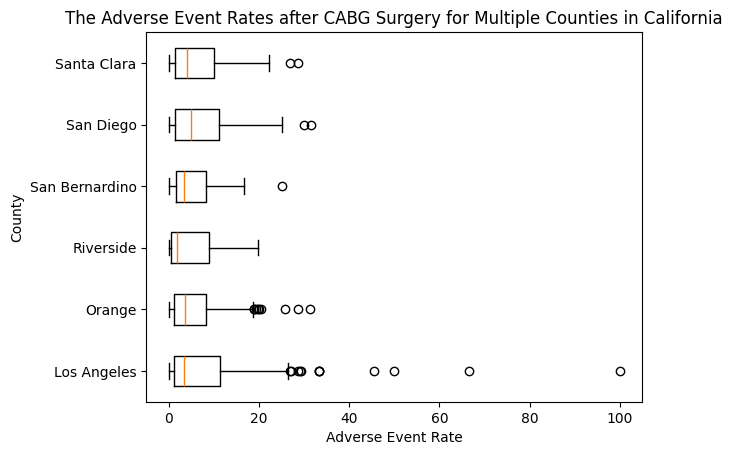

In [99]:
plt.boxplot(samples, tick_labels=county_order, vert = False)
plt.title("The Adverse Event Rates after CABG Surgery for Multiple Counties in California")
plt.xlabel("Adverse Event Rate")
plt.ylabel("County")

As a post-hoc test, we also can run Tukey's Post-Hoc test with $\alpha = 0.05$ to identify the county that is causing the difference:

- $H_0$: The two counties being compared have no difference in their means (average adverse event rate)
- $H_A$: The two counties being compared have different means

In [100]:
pvalue_tukey = pd.DataFrame(stats.tukey_hsd(*samples).pvalue)
display(pvalue_tukey)

,0,1,2,3,4,5
0,1.000000,0.320846,0.327454,0.497435,0.995515,0.994209
1,0.320846,1.000000,0.995001,0.999978,0.358416,0.929752
2,0.327454,0.995001,1.000000,0.999541,0.301209,0.802988
3,0.497435,0.999978,0.999541,1.000000,0.448804,0.923342
4,0.995515,0.358416,0.301209,0.448804,1.000000,0.962114
5,0.994209,0.929752,0.802988,0.923342,0.962114,1.000000


But notice that most of the p-values are far greater than $\alpha$, and so Tukey's does not yield statistically significant results.

# Machine Learning

Statistical testing is powerful, but limited. In addition to analyzing existing data, data scientists often want to *use* trends in existing data and extrapolate it to future scenarios, which statistical testing can do in a limited way. Thus, we use **machine learning** techniques to hopefully give a more detailed answer to the above questions.

## Relationships between location and hospital performance(Question 1)
### Initial Observations
From the data frame below, we can see that the "As Expected" category for hospital ratings is the overwhelming majority category. We can also see that the dataset captures a larger variety of counties with more proportional representation from each category than for the hospital ratings.

In [108]:
path = "mortrates.csv"
df = pd.read_csv(path)
print(df['Hospital Ratings'].value_counts().head())
print(df['COUNTY'].value_counts().head(10))
df

Hospital Ratings
As Expected    33093
Better          1581
Worse           1504
Name: count, dtype: int64
COUNTY
Los Angeles       13968
Orange             4044
San Bernardino     3060
Riverside          2964
San Diego          2714
Alameda            2104
San Francisco      1828
Kern               1800
Santa Clara        1620
Sacramento         1440
Name: count, dtype: int64


,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
0,2016,AAAA,STATEWIDE,NaN,AAA Repair Unruptured,1.3,30,2358,NaN,NaN,NaN
1,2016,AAAA,STATEWIDE,NaN,AMI,6.1,3178,52167,NaN,NaN,NaN
2,2016,AAAA,STATEWIDE,NaN,Acute Stroke,9.1,5482,60184,NaN,NaN,NaN
3,2016,AAAA,STATEWIDE,NaN,Acute Stroke Hemorrhagic,21.1,2580,12210,NaN,NaN,NaN
4,2016,AAAA,STATEWIDE,NaN,Acute Stroke Ischemic,5,2258,45141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57649,2022,Yuba,Adventist Health and Rideout,106580996.0,Heart Failure,3.6,23,712,As Expected,-121.593602,39.138805
57650,2022,Yuba,Adventist Health and Rideout,106580996.0,Hip Fracture,4,6,167,As Expected,-121.593602,39.138805
57651,2022,Yuba,Adventist Health and Rideout,106580996.0,PCI,4.3,7,146,As Expected,-121.593602,39.138805
57652,2022,Yuba,Adventist Health and Rideout,106580996.0,Pancreatic Resection,NaN,NaN,NaN,NaN,-121.593602,39.138805


### Clean the Dataset
We have to remove all non-numeric/null quantities from each of the tables. Also, we have to remove the "None" category from the hospital ratings since "None" will not provide us with any valuable information for our classification/regression. Additionally, '.' appears frequently in the dataset. To take it out of the dataset, we first had to convert all of the '.' to "None" and replace "None" with NA so that we can use the dataframe's dropna function.

In [109]:
# Load and basic clean

df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Ensure numeric types for necessary columns
df["# of Deaths"] = pd.to_numeric(df["# of Deaths"], errors="coerce")
df["# of Cases"] = pd.to_numeric(df["# of Cases"], errors="coerce")
df.replace(".", "None", inplace=True)
df.replace("None", pd.NA, inplace=True)

df["Risk Adjusted Mortality Rate"] = df["Risk Adjuested Mortality Rate"] #There is a typo in the original DataFrame Column, so we rename it
df = df.drop(columns = ["Risk Adjuested Mortality Rate"])
df["Risk Adjusted Mortality Rate"] = pd.to_numeric(df["Risk Adjusted Mortality Rate"], errors="coerce")

# Drop rows where conversion failed (NaNs)
df.dropna(subset=["# of Deaths", "# of Cases", "Risk Adjusted Mortality Rate", "Hospital Ratings"], inplace=True)
df

,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE,Risk Adjusted Mortality Rate
17,2016,Alameda,Alameda Hospital,106010735.0,AMI,3,17,As Expected,-122.253991,37.76266,16.1
18,2016,Alameda,Alameda Hospital,106010735.0,Acute Stroke,9,74,Worse,-122.253991,37.76266,23.6
19,2016,Alameda,Alameda Hospital,106010735.0,Acute Stroke Hemorrhagic,5,9,Worse,-122.253991,37.76266,48.9
20,2016,Alameda,Alameda Hospital,106010735.0,Acute Stroke Ischemic,4,65,As Expected,-122.253991,37.76266,15.2
24,2016,Alameda,Alameda Hospital,106010735.0,GI Hemorrhage,5,83,As Expected,-122.253991,37.76266,4.6
...,...,...,...,...,...,...,...,...,...,...,...
57648,2022,Yuba,Adventist Health and Rideout,106580996.0,GI Hemorrhage,6,247,As Expected,-121.593602,39.138805,2.5
57649,2022,Yuba,Adventist Health and Rideout,106580996.0,Heart Failure,23,712,As Expected,-121.593602,39.138805,3.6
57650,2022,Yuba,Adventist Health and Rideout,106580996.0,Hip Fracture,6,167,As Expected,-121.593602,39.138805,4.0
57651,2022,Yuba,Adventist Health and Rideout,106580996.0,PCI,7,146,As Expected,-121.593602,39.138805,4.3


In [110]:
features = ["LATITUDE", "LONGITUDE", "COUNTY"]
target = "Hospital Ratings"

df["LATITUDE"] = pd.to_numeric(df["LATITUDE"], errors="coerce")
df["LONGITUDE"] = pd.to_numeric(df["LONGITUDE"], errors="coerce")

df.dropna(subset=["LATITUDE", "LONGITUDE", "COUNTY"], inplace=True)

X = df[features]
y = df[target]

### Feed the Data Into an ML Model
After preparing our data, we can put our data into a machine learning model to predict the hospital rating given its location (latitude, longitude, county). Notice that we need to convert "County" into a numeric variable since "County" is currently a categorical variable.

We will then output the model results by performing a classification report. This report will give us how well the model performed and where it performed well and where it didn't. The confusion matrix helps us visualize the data presented in the classification report.

Classification Report:
              precision    recall  f1-score   support

 As Expected       0.96      0.46      0.62      8227
      Better       0.11      0.71      0.19       395
       Worse       0.10      0.68      0.17       376

    accuracy                           0.48      8998
   macro avg       0.39      0.62      0.33      8998
weighted avg       0.89      0.48      0.58      8998

Confusion Matrix:


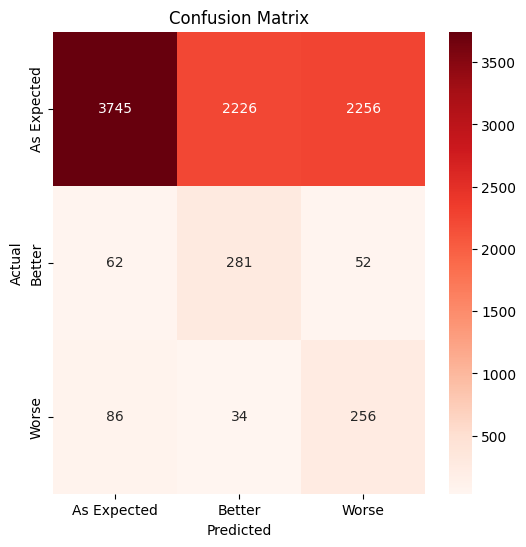

In [111]:
# Note: COUNTY is not numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["LATITUDE", "LONGITUDE"]),
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["COUNTY"])
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",  RandomForestClassifier(n_estimators=150, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The following scatterplot plots the geographic locations of each of the hospitals. The legend on the right side of the graph shows the rating of the hospitals. Just from looking at the graph alone, we can't tell a lot about if location has an impact on the hospital ratings since the hospitals with "Worse" or "Better" ratings are distributed somewhat evenly.

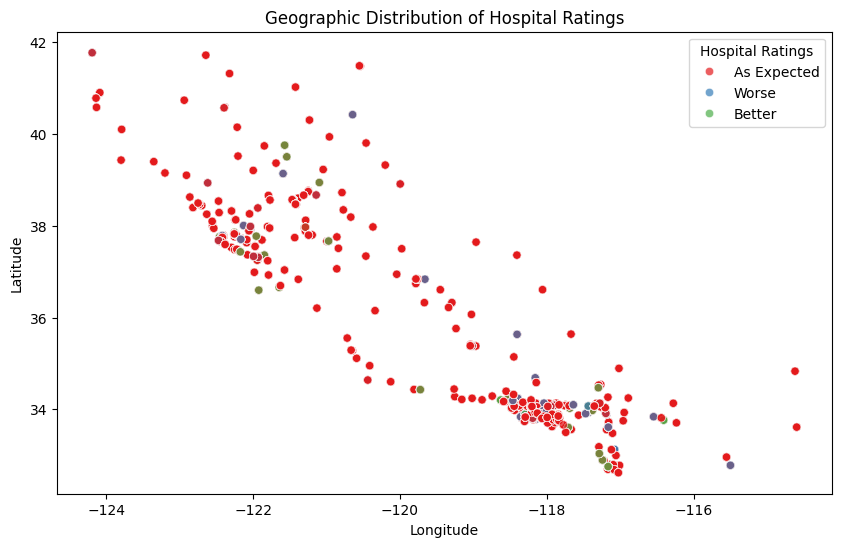

In [112]:
# First time running may produce a line. Re-run and it will produce a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="LONGITUDE",
    y="LATITUDE",
    hue="Hospital Ratings",
    palette="Set1",
    alpha=0.7
)
plt.title("Geographic Distribution of Hospital Ratings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Classification Analysis
For predicting hospital ratings, I used the random forest classification method. Since hospital ratings is a categorical variable, it makes sense to use a classification model instead of a regression model. However, since the "As Expected" category was the overwhelming majority of the data, my model couldn't predict hospitals in the "Better" or "Worse" ratings as accurately as it predicted the "As Expected" category. Another reason for the low accuracy is that from our scatterplot (refer to <b>Data Visualization</b>) we see that there is little to no correlation between the location and the hospital quality ratings. It's possible that this lack of correlation made it difficult for the model to find patterns and accurately predict the hospital ratings.

**Since** we know that location-based features are not good predictors for hospital ratings or mortality rates, we need to find which feature/features best predict these targets. To do this, we need to use a regression model. The model that we chose to use is the gradient boosting regressor.

R² Score: 0.82


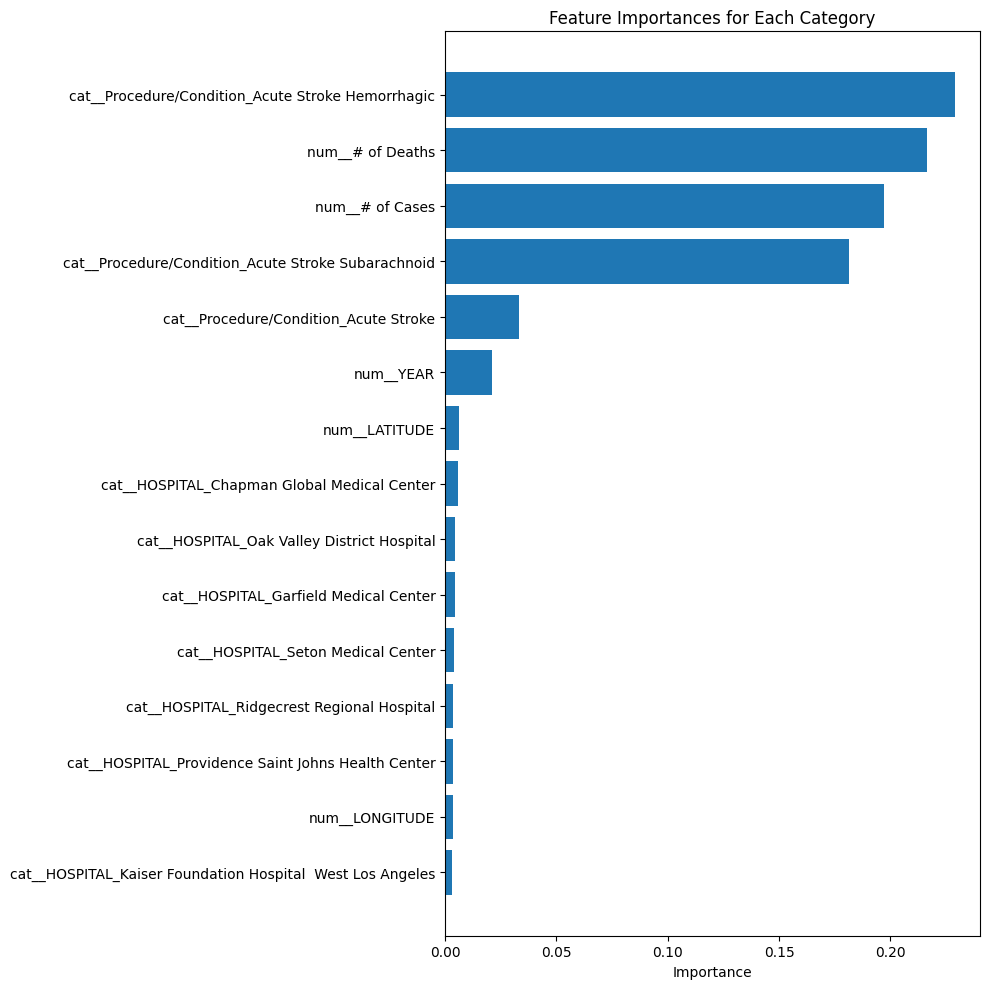

In [113]:
# Remove NA
df.columns = df.columns.str.strip()
df = df.dropna(subset=["YEAR", "# of Deaths", "# of Cases", "Procedure/Condition",
    "HOSPITAL", "COUNTY", "LATITUDE", "LONGITUDE", "Risk Adjusted Mortality Rate"])

# Features and targets
features = ["YEAR", "# of Deaths", "# of Cases", "Procedure/Condition", "HOSPITAL", "COUNTY", "LATITUDE", "LONGITUDE"]
target = "Risk Adjusted Mortality Rate"

X = df[features]
y = df[target]

num_features = ["YEAR", "# of Deaths", "# of Cases", "LATITUDE", "LONGITUDE"]
cat_features = ["Procedure/Condition", "HOSPITAL", "COUNTY"]
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=175, max_depth=6))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print result of regression
print(f"R² Score: {r2:.2f}")
preprocessed_X = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

gbr = GradientBoostingRegressor(n_estimators=175, max_depth=6)
gbr.fit(preprocessed_X, y)
importances = gbr.feature_importances_

indices = np.argsort(importances)[-15:]
plt.figure(figsize=(10, 10))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Feature Importances for Each Category")
plt.tight_layout()
plt.show()

### Regression Analysis
After using gradient boosting regression, we can see that the latitude, longitude, and county have little to no importance in the prediction of risk adjusted mortality rate. However, the acute stroke hemorrhagic procedure, number of deaths, and number of cases all have a very high importance when predicting risk adjusted mortality rate. It's also important to note that the model's accuracy ($R^2$ in the case for regression), is $\approx 0.8$, much higher than the accuracy rate for the random forest classifier.

### Conclusion
From our random forest classification, we can see that the physical location of the hospital <b>does not</b> have a noticeable impact on the quality rating of a hospital. This corresponds with our initial observation that the hospitals rated "Better", "Worse", and "As Expected" seem to be evenly distributed in the scatterplot. After getting a lower accuracy for predicting hospital ratings, we then used gradient boosting regression to determine what kinds of features impact the mortality rates for given procedures. From our regression analysis, we can see that non location-based features such as # of deaths and # of cases predict the mortality rates of procedures much more than location-based features. This result explains why our original classification was getting a somewhat low accuracy.

## Trends over Time in Hospital Performance Measures (Question 3)

We want to know if there exists trends in performance ratings over time, including mortality. Thus, we attempt to run regression in order to figure out whether most hospitals have seen an increase or decrease in the performance ratings over time.

Ideally this would be performed on a large dataset, such as the dataset analyzing the six procedures in Calfornian hospitals. Unfortunately, the dataset metadata advises strongly against finding and comparing trends over time. This is partly due to a change in the rating standards over time, and standardizing the ratings is impossible.

However, we may have some luck examining the CABGS dataset (which analyzes adverse events in patients after surgery treating Coronary Artery Disease). While this dataset is a lot smaller, it focuses on only one type of surgery (CABGS). Moreover, it examines a variety of criteria regarding this surgery, including, **but not limited to**, mortality rate per hospital. Having knowledge of these various criteria and how they evolve over time may help answer other questions about general trends in Californian hospitals.

Before this, using the regular CABGS dataset is very limited, since it only includes data between 2018-2022. It is better if we expand our search to include more years beyond that. Luckily, the dataset's webpage contains data from 2011-2018 in a separate Database. This has measures of the same factors in the 2018-2022 dataset, only this time in a different time range.

Before we run regression, we would like to perform additional preprocessing in each DataFrame, so that the columns are well adjusted for the regression analysis. First, we preprocess the CABGS 2011-2018 dataset.

In [114]:
new_measures = ["30-Day Readmission", "Post-Operative Stroke", "CABG Operative Mortality", "CABG+Valve Operative Mortality"] #Here are the measures we will be testing

#The following are helper functions, used to convert each value in the dataframe to a string, int, or whatever type is required. Null values are also handled in these functions.
def get_year(s):
  index = s.find("-")
  if index == -1:
    if s.isnumeric():
      return int(s) - 2011
    return 0
  return (int(s[:index]) + int(s[index + 1:]))/2 - 2011

def get_rate(s):
  if s == ' ' or s == '.':
    return 0.0
  index = s.find(",")
  if index == -1:
    return float(s)
  return float(s[index + 1:])

def get_measure(s):
  s = s.strip()
  if(s == "CABG Operative Mortality" or s == "Operative Mortality"):
    return "Isolated CABG Operative Mortality"
  elif(s == "CABG + Valve Operative Mortality"):
    return "CABG+Valve Operative Mortality"
  elif(s == "30-day Readmission" or s == "30-Day Readmission" or s == "CABG 30-Day Readmission"):
    return "Isolated CABG 30-Day Readmission"
  return "Isolated CABG Post-Operative Stroke"



cabgs_df11 = pd.read_csv("cabgs11-18.csv", encoding = 'cp1252')

# Here we drop all NA values and convert each column into its respective type
cabgs_df11 = cabgs_df11.dropna(subset = ["Year", "Risk-adjusted Rate", "OSHPD ID"])
cabgs_df11["OSHPD ID"] = cabgs_df11["OSHPD ID"].astype("string").apply(lambda x: None if (x == "" or x == " ") else int(x))
cabgs_df11 = cabgs_df11.dropna(subset = ["OSHPD ID"])

#We standardize the performance rating values, and performance measure values to ensure they are of the correct type. County and ID values are also standardized.
cabgs_df11["Performance Rating"] = cabgs_df11["Performance Rating"].astype("string").apply(lambda x: "Average" if (pd.isna(x) or x not in ["Better", "Average", "Worse"]) else x)
cabgs_df11["Performance Measure"] = cabgs_df11["Performance Measure"].astype("string").apply(get_measure)
cabgs_df11["County"] = cabgs_df11["County"].astype("string")
cabgs_df11["OSHPD ID"] = cabgs_df11["OSHPD ID"].astype("int")

#YearsSince2011 represents the number of years since 2011
cabgs_df11["YearsSince2011"] = cabgs_df11["Year"].astype("string").apply(get_year)
cabgs_df11["Risk-adjusted Rate"] = cabgs_df11["Risk-adjusted Rate"].astype("string").apply(get_rate)
cabgs_df11["Performance Rating"] = cabgs_df11["Performance Rating"].astype("string")

#Here we remove outliers in the code by checking to see if values are more/less than 1.5 times the IQR range. This is a standard method to remove unnecessarily large or small values in data science.
rates_group_11 = cabgs_df11.groupby("Performance Measure")
new_dfs_11 = []
for _, df in rates_group_11:
  Q1 = df["Risk-adjusted Rate"].quantile(0.25) #25th percentile
  Q3 = df["Risk-adjusted Rate"].quantile(0.75) #25th percentile
  IQR = Q3 - Q1 #Interquartile Range
  lb = Q1 - 1.5 * IQR #Lower bound for outliers
  ub = Q3 + 1.5 * IQR #Upper bound for outliers
  new_dfs_11.append(df[(df["Risk-adjusted Rate"] >= lb) & (df["Risk-adjusted Rate"] <= ub)]) #Remove anything out of bounds

cabgs_df11 = pd.concat(new_dfs_11)
display(cabgs_df11.shape)


(3491, 12)

Now preprocessing the CABGS 2018-2022 dataset (again):

In [115]:
cabgs_df18 = pd.read_csv("cabgs18-22.csv")
cabgs_df18_nan = cabgs_df18[cabgs_df18.isna().any(axis = 1)] #Get all rows with at least one NaN value in them

#Much of the following code is preprocessing the data, just like above, except for the 2018-2022 database
nan_row = cabgs_df18_nan.index.to_list()[0]
cabgs_df18 = cabgs_df18.drop(index = nan_row)
cabgs_df18["OSHPD ID"] = cabgs_df18["Hospital ID"].astype("string").apply(lambda x: None if (x == "" or x == " ") else float(x))

cabgs_df18["Statewide Adverse Events Rate (%)"] = cabgs_df18["Statewide Adverse Events Rate (%)"].astype("string").apply(get_rate)

cabgs_df18["County"] = cabgs_df18["County"].astype('string')
cabgs_df18['Performance Measure'] = cabgs_df18['Performance Measure'].astype("string")
cabgs_df18["Hospital ID"] = cabgs_df18["Hospital ID"].astype("int")
cabgs_df18["OSHPD ID"] = cabgs_df18["OSHPD ID"].astype("int")

cabgs_df18["YearsSince2011"] = cabgs_df18["Year"].astype("string").apply(get_year)
cabgs_df18['Risk-adjusted Rate'] = cabgs_df18['Hospital Risk-Adjusted Adverse Events Rate (%,RAAER)'].apply(get_rate)

rates_group = cabgs_df18.groupby("Performance Measure")
new_dfs = []
for _, df in rates_group:
  Q1 = df["Risk-adjusted Rate"].quantile(0.25)
  Q3 = df["Risk-adjusted Rate"].quantile(0.75)
  IQR = Q3 - Q1
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  new_dfs.append(df[(df["Risk-adjusted Rate"] >= lb) & (df["Risk-adjusted Rate"] <= ub)])

cabgs_df18 = pd.concat(new_dfs)

cabgs_df18["Performance Rating"] = cabgs_df18["Performance Rating"].astype("string").apply(lambda x: "Average" if (pd.isna(x) or x not in ["Better", "Average", "Worse"]) else x)

Recall that we have four specific factors that are measured in the CABGS dataset (from the statistical analysis):
- Isolated CABG Operative Mortality
- CABG+Valve Operative Mortality
- Isolated CABG Post-Operative Stroke
- Isolated CABG 30-day Readmission

Ultimately we would like to examine trends in each or all of these factors aggregated as a function of time. But before we do this, it is helpful to **visualize** each of the factors in a chart. Visualizing in general is a useful tool in data science: before jumping straight into statistical techniques and neural networks, it is often beneficial to know whether the type of analysis being done is even relevant enough for the problem based on visual features.

Motivated by this idea, we first plot a graph of each of the factors as a function of time, **aggregated by each hospital name**. The hope is that if we see any linear of polynomial trends in the graph (for instance if we see readmission rates go up over time for all hospitals) we can use the respective regression technique (i.e. LinearRegression(), PolynomialFeatures(), etc.) to hopefully **fit** a good model to it.

Remember, our ultimate goal in doing all this analysis is to predict how different adverse events are evolving over time. Knowing this information allows us to examine how hospitals have been handling these events over time and how the future fares for these hospitals.


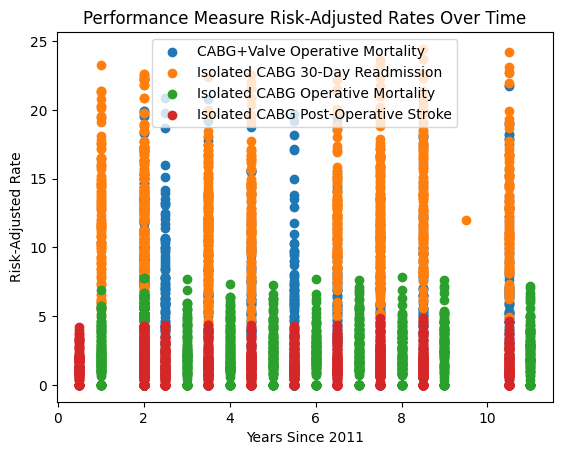

In [120]:
data_rot = {} #This will store all data regarding performance measures

measures_group11 = cabgs_df11.groupby("Performance Measure")
measures_group18 = cabgs_df18.groupby("Performance Measure")

#Store the year and the risk adjusted rate for each performance rate for the 2011-2018 dataset in a list
for measure, df in measures_group11:
  data_rot[measure] = [df["YearsSince2011"].to_numpy().astype(float), df["Risk-adjusted Rate"].to_numpy().astype(float)]

#Do the same for the 2018-2022 dataset, except append to the list by concatenating
for measure, df in measures_group18:
  data_rot[measure][0] = np.concatenate([data_rot[measure][0], df["YearsSince2011"].to_numpy().astype(float)])
  data_rot[measure][1] = np.concatenate([data_rot[measure][1], df["Risk-adjusted Rate"].to_numpy().astype(float)])

#Now plot the measures on the graph
for measure, xy in data_rot.items():
  length = len(xy[0])
  indices = np.random.choice(np.arange(0, length), size = 300)
  year = np.array(xy[0])
  rar = np.array(xy[1])
  plt.scatter(year, rar, label = measure)

plt.legend()
plt.title("Performance Measure Risk-Adjusted Rates Over Time")
plt.xlabel("Years Since 2011")
plt.ylabel("Risk-Adjusted Rate")
plt.show()

Immediately we see a problem: there is a lot of variance in the data! The values vary too much in range, even with outliers removed from the data prior. Observe that also, ranges in rates for each adverse event changes significantly -- for instance the post-operative stroke range is between 0-5%, but the readmission rate is way higher, from 0-25%. This happens because, in this case, readmission can be due to a variety of factors (including stroke), all in tandem as well. Fortunately, we can still salvage something useful!

In order to better analyze our data, it is much better to group by the hospital first, then the Performance Measure, and group the values this way. We can then regress on the trends based on a specific hospital, which will be much more effective since the data from that hospital is specific to it, and doesn't depend on anything else.

Let us first re-group the data by Performance Measure and hospital so that we can perform the regression.

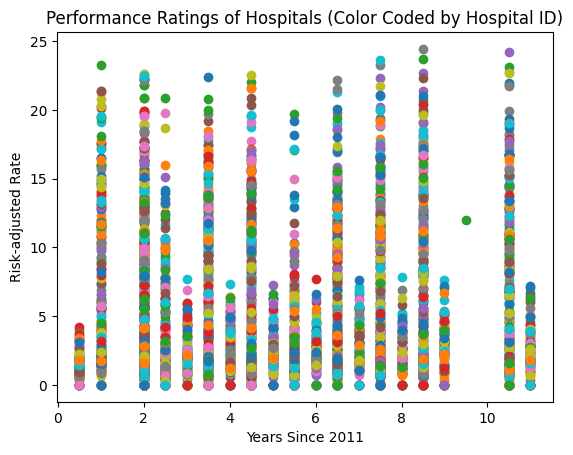

'Max R^2: 1.0'

'Min R^2: 2.2844815852351985e-06'

In [117]:
#Concatenate the two preprocessed datasets above (2011-2018, 2018-2022) into one dataset and keep relevant data
cabgs_df = pd.concat([cabgs_df11, cabgs_df18])[["YearsSince2011", "OSHPD ID", "Hospital", "Risk-adjusted Rate", "Performance Measure", "Performance Rating", "Latitude", "Longitude"]]


#We group by OSHPD ID here since ID stays the same over time and is only ever one integer, unlike hospital name which can be represented in different ways
#Here we group by hospital then store the performance measures regarding that hospial
data_rot_hospital = {}
hospitals_group = cabgs_df.groupby("OSHPD ID")
for ID, df in hospitals_group:
  years = df["YearsSince2011"].to_numpy().astype(float)
  data_rot_hospital[ID] = [years, df["Risk-adjusted Rate"].to_numpy().astype(float)]

#Run linear regression on each hospitals' performance measure (aggregated) and plot all performance measures
r2_scores = {}
for ID, dic in data_rot_hospital.items():
  X = dic[0]
  Y = dic[1]
  reg = LinearRegression().fit(X.reshape(-1, 1), Y)
  plt.scatter(dic[0], dic[1], label = ID)
  r2c = r2_score(Y.reshape(-1, 1), reg.predict(X.reshape(-1, 1)))
  r2_scores[ID] = r2c

plt.title("Performance Ratings of Hospitals (Color Coded by Hospital ID)")
plt.xlabel("Years Since 2011")
plt.ylabel("Risk-adjusted Rate")
plt.show()

display("Max R^2: " + str(max(r2_scores.values())))
display("Min R^2: " + str(min(r2_scores.values())))

Now we run regression on each hospital and each of its performance measures:

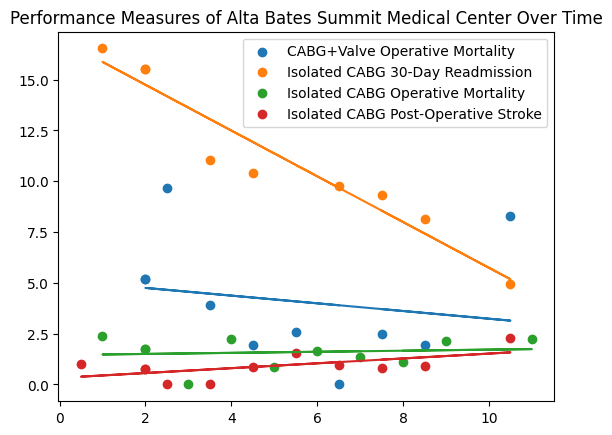

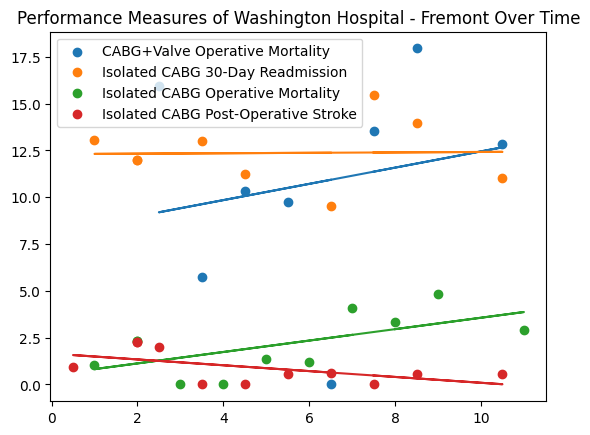

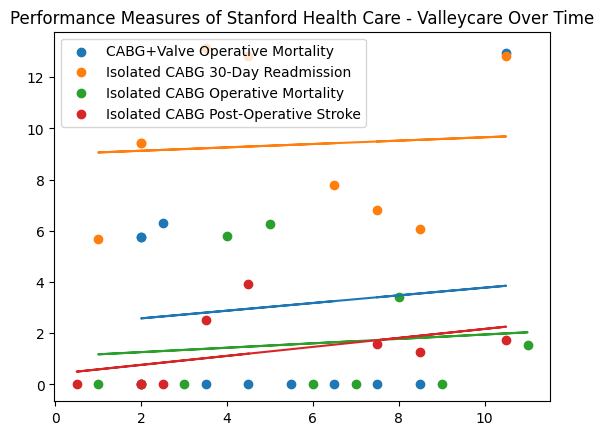

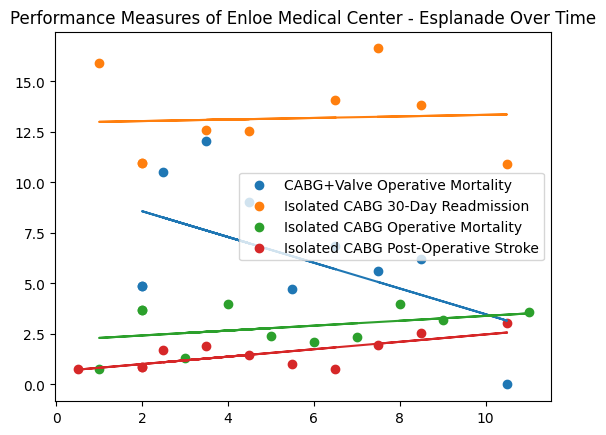

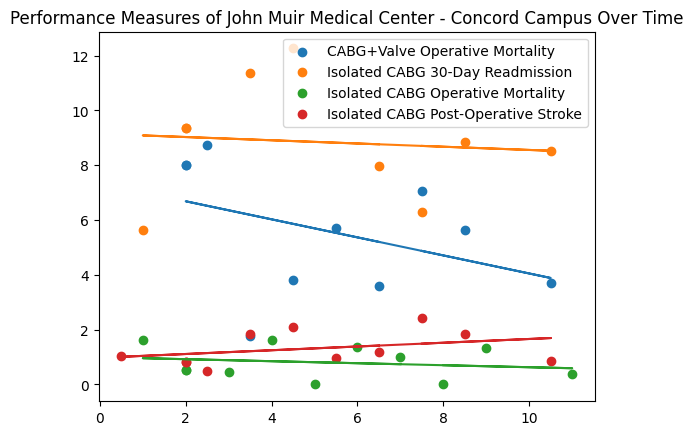

In [118]:
data_rot_by_measure = {}
for ID, temp in hospitals_group: #Group by hospital
  data = {}
  for measure, df in temp.groupby("Performance Measure"): #Group by performance measure
    length = len(df["YearsSince2011"].to_numpy().astype(float))
    if length < 5: #Discard data from hospitals with less than 5 performance measure data points to report
      break
    data[measure] = [df["YearsSince2011"].to_numpy().astype(float), df["Risk-adjusted Rate"].to_numpy().astype(float)] #Store data as above
  if len(data.keys()) < 3: #If the hospital in total does not report statistics regarding ALL performance measures, remove it
    continue
  data_rot_by_measure[ID] = data


#Now run linear regression on each hospital and each of its performance measures, then plot the performance measures for each hospital as well as the regression for each measure
for ID, dic in list(data_rot_by_measure.items())[:5]:
  for measure, xy in dic.items():
    hospital_name = cabgs_df[cabgs_df["OSHPD ID"] == ID]["Hospital"].unique()[0]
    data = data_rot_by_measure[ID][measure]
    X = data[0]
    Y = data[1]
    reg = LinearRegression().fit(X.reshape(-1, 1), Y)
    plt.scatter(X, Y, label = measure)
    plt.plot(X, reg.predict(X.reshape(-1, 1)))
    plt.title("Performance Measures of " + hospital_name + " Over Time")
  plt.legend()
  plt.show()

With these graphs, we see that the trends vary between hospitals by a lot -- some hospitals see increases in stroke rate, others with a decrease, and others where it doesn't change a lot. This applies for other factors as well. Moreover, the relationship **strength** changes too much. The $R^2$ values tell evidently how much the data follows a linear patter, with an absolute value score close to 1 being a strong linear relationship and a score close to 0 otherwise. From the $R^2$ value ranges printed above, we see the $R^2$ values range from 0.06 to 1, which is too wide a range. Further, visually from the graphs above, it seems that the linear relationship is bot very strong for some measures, while for others it is. Based on these factors, therefore, we can only conclude that the **hospital performance measures don't vary significantly enough with time**, according to this data. Using any other form of regression might cause the model to overfit, which wouldn't be good for generalizing the model to other hospitals and into future years.

Why might there not be a significant trend in the adverse event rates over time? There is too much variance, but what *causes it*? A major reason for this variance is that rating scales and standards may change year-by-year. Different criteria may cause ratings to change wildly between years. COVID-19 may have also skewed the rates near the end, making them more unreliable.

It is also that there wasn't enough data in the first place. Since the rates were documented by year, there were too few datapoints to make a conclusive analysis. Adding more data between years would make the trends more likely, but again this might not be possible since mortality rates between time periods shorter than a year might vary too significantly.

But perhaps the most important reason is that **there are too many confounding variables** -- variables other than time affecting the adverse event rates. For instance, older people are generally more averse to stroke and mortality. Another example -- people living in heavily polluted cities suffer from other health complications that might affect their readmission rate as well. Location may also play a role. Given that there are too many variables affecting the adverse event rate that we cannot control for, and with the low amount of data in this dataset, we cannot reliably conclude that adverse event rates in general vary with time in a significant manner.

## Investigating Hospital Ratings Caused by Mortality (Question 2)

From the counts of each hospital above (see Data Exploration), we can see that some hospitals were very underrepresented ($14$) while many were very overrepresented ($180$).

Since the population mean is not resistant to outliers, we decided to remove all of the outliers in the dataset at the beginning before proceeding with the preliminary data analysis.

In [119]:
#use this api call as an example in your browser #https://api.census.gov/data/2014/acs/acs5/variables.html    it gets you 2014 data
params = {    #I used the parameters below to place an API call to the American Community Survey (5 year data)
    "get": "NAME,B01003_001E,B19013_001E,B27010_001E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E",
    "for": "county:*",
    "in": "state:06",
    "key": "541d9801f32888a712369a34471ad2b037e32220"
}
all_data = dict()  #dictionary for different
for year in range(2010, 2023): #these years were  derived from the previous fail messages
  time.sleep(1)#lets not overwhelm the api
  url = f"https://api.census.gov/data/{year}/acs/acs5"
  response = requests.get(url, params=params, timeout=10)  #get the response from the API
  if response.status_code == 200:
    data = response.json()    #creates a python object
    df = pd.DataFrame(data[1:], columns=data[0]) #we skip the headers and make our dataframe
    df.rename(columns={"B01003_001E": "Population", "B19013_001E": "Median_Income", "B27010_001E": "Health_Insurance"}, inplace=True)
    df["Year"] = year
    all_data[year] = df#actually puts dataframe in the dictionary
  else:
    print(f"MAJOR FAILURE FETCHING YEAR: {year}" )    #sometimes the columns B01001_020E were not in surveys taken 10+ years ago I use this to tell myself which years those were
#for year in range(2010, 2022):
#    display(all_data[year])
print(df.head())

MAJOR FAILURE FETCHING YEAR: 2010
MAJOR FAILURE FETCHING YEAR: 2011
MAJOR FAILURE FETCHING YEAR: 2012
                           NAME Population Median_Income Health_Insurance  \
0    Alameda County, California    1663823        122488          1654106   
1     Alpine County, California       1515        101125             1515   
2     Amador County, California      40577         74853            37591   
3      Butte County, California     213605         66085           211587   
4  Calaveras County, California      45674         77526            45341   

  B01001_020E B01001_021E B01001_022E B01001_023E B01001_024E B01001_025E  \
0       16861       19794       30165       17775       12014       10807   
1          57          51          88          15           0           2   
2         715         855        1587        1128         465         421   
3        2559        3563        4981        3217        1719        1565   
4         813        1075        1942        1225 

In [121]:
df = pd.read_csv("mortrates.csv")
df = df.dropna(subset=['Hospital Ratings', 'Risk Adjuested Mortality Rate']) #we need these columns to be perfect
rating_map = {'As Expected': 1, 'Worse': 0, 'Better': 2}                     #dict for hospital ratings
county_dict = {                                                     #this is what allows me to join the two datasets since they are both county ones
    'Alameda': 'Alameda County, California',
    'Amador': 'Amador County, California',
    'Butte': 'Butte County, California',
    'Calaveras': 'Calaveras County, California',
    'Colusa': 'Colusa County, California',
    'Contra Costa': 'Contra Costa County, California',
    'Del Norte': 'Del Norte County, California',
    'El Dorado': 'El Dorado County, California',
    'Fresno': 'Fresno County, California',
    'Glenn': 'Glenn County, California',
    'Humboldt': 'Humboldt County, California',
    'Imperial': 'Imperial County, California',
    'Inyo': 'Inyo County, California',
    'Kern': 'Kern County, California',
    'Kings': 'Kings County, California',
    'Lake': 'Lake County, California',
    'Lassen': 'Lassen County, California',
    'Los Angeles': 'Los Angeles County, California',
    'Madera': 'Madera County, California',
    'Marin': 'Marin County, California',
    'Mariposa': 'Mariposa County, California',
    'Mendocino': 'Mendocino County, California',
    'Merced': 'Merced County, California',
    'Modoc': 'Modoc County, California',
    'Mono': 'Mono County, California',
    'Monterey': 'Monterey County, California',
    'Napa': 'Napa County, California',
    'Nevada': 'Nevada County, California',
    'Orange': 'Orange County, California',
    'Placer': 'Placer County, California',
    'Plumas': 'Plumas County, California',
    'Riverside': 'Riverside County, California',
    'Sacramento': 'Sacramento County, California',
    'San Benito': 'San Benito County, California',
    'San Bernardino': 'San Bernardino County, California',
    'San Diego': 'San Diego County, California',
    'San Francisco': 'San Francisco County, California',
    'San Joaquin': 'San Joaquin County, California',
    'San Luis Obispo': 'San Luis Obispo County, California',
    'San Mateo': 'San Mateo County, California',
    'Santa Barbara': 'Santa Barbara County, California',
    'Santa Clara': 'Santa Clara County, California',
    'Santa Cruz': 'Santa Cruz County, California',
    'Shasta': 'Shasta County, California',
    'Siskiyou': 'Siskiyou County, California' ,
    'Solano': 'Solano County, California',
    'Sonoma': 'Sonoma County, California',
    'Stanislaus': 'Stanislaus County, California',
    'Tehama': 'Tehama County, California',
    'Trinity': 'Trinity County, California',
    'Tulare': 'Tulare County, California',
    'Tuolumne': 'Tuolumne County, California',
    'Ventura': 'Ventura County, California',
    'Yolo': 'Yolo County, California',
    'Yuba': 'Yuba County, California'
}
X = list()   #these are used for regression later X, Y
Y = list()
full = list()   #this constructs dataframes later on
counter = 0
for index, row in df.iterrows():     #iterate over everything in the healthcare dataframe
    yer = row['YEAR']
    if (yer > 2012) and (yer < 2023):
        if row['COUNTY'] in county_dict:
            county = county_dict[row['COUNTY']]  #we need to get the county to extract the stats then we create an entry for each procedure with its county stats
            year_df = all_data[yer]
            percent_over_65 = (float(float(year_df.loc[year_df['NAME'] == county, 'B01001_020E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_021E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_022E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_023E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_024E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_025E'].iloc[0])))/(float(year_df.loc[year_df['NAME'] == county, 'Population'].iloc[0]))
            insured_percent = (float(year_df.loc[year_df['NAME'] == county, 'Health_Insurance'].iloc[0]))/(float(year_df.loc[year_df['NAME'] == county, 'Population'].iloc[0]))
            x_entry = (counter, row['YEAR'], row['COUNTY'], row['HOSPITAL'], rating_map[row['Hospital Ratings']], row['Procedure/Condition'], row['Risk Adjuested Mortality Rate'], year_df.loc[year_df['NAME'] == county, 'Population'].iloc[0], year_df.loc[year_df['NAME'] == county, 'Median_Income'].iloc[0], insured_percent, percent_over_65)
            y_entry = (counter, rating_map[row['Hospital Ratings']])
            full.append(x_entry)
            x_entry2 = (counter, row['YEAR'], row['COUNTY'], row['HOSPITAL'], row['Procedure/Condition'], row['Risk Adjuested Mortality Rate'], year_df.loc[year_df['NAME'] == county, 'Population'].iloc[0], year_df.loc[year_df['NAME'] == county, 'Median_Income'].iloc[0], insured_percent, percent_over_65)
            X.append(x_entry2)
            Y.append(y_entry)
            counter += 1

In [122]:
#regression this is how I investigated what sort of approach to take
#this regression wasn't very sucessful but pointed me in the right direction in which i needed to go
X_df = pd.DataFrame(X, columns=['ID', 'YEAR', 'COUNTY', 'HOSPITAL', 'PROC', 'MORTALITY', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65'])
Y_df = pd.DataFrame(Y, columns=['ID', 'Hospital Ratings'])
rating_map = {'As Expected': 1, 'Worse': 0, 'Better': 2}
Y_df['Hospital Ratings'] = Y_df['Hospital Ratings']

merged = pd.merge(X_df, Y_df, on='ID')

merged['MORTALITY'] = pd.to_numeric(merged['MORTALITY'], errors='coerce')           #make em number
merged['Hospital Ratings'] = pd.to_numeric(merged['Hospital Ratings'], errors='coerce')

merged = merged.dropna(subset=['MORTALITY', 'Hospital Ratings'])

predictors = ['MORTALITY']# , 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65'      # checking how good of a predictor mortality is
X_mortality = sm.add_constant(merged[predictors])
y = merged['Hospital Ratings']

model = sm.OLS(y, X_mortality).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Hospital Ratings   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1369.
Date:                Wed, 14 May 2025   Prob (F-statistic):          3.51e-294
Time:                        11:14:10   Log-Likelihood:                -6154.3
No. Observations:               36094   AIC:                         1.231e+04
Df Residuals:                   36092   BIC:                         1.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0387      0.002    575.375      0.0

Clearly, The regression above did not provide massive insight into the variance in our dataset. This is to be expected because there are more
factors that determine hospital rating than just mortality. What is important is that there is a statistically significant relationship between the
mortality rate and the hospital rating because the p value is less than 0.05

In [123]:
# Create dataframes
X_df = pd.DataFrame(X, columns=[
    'ID', 'YEAR', 'COUNTY', 'HOSPITAL', 'PROC',
    'MORTALITY', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65'
])
Y_df = pd.DataFrame(Y, columns=['ID', 'Hospital Ratings'])

rating_map = {'As Expected': 1, 'Worse': 0, 'Better': 2} #map
Y_df['Hospital Ratings'] = Y_df['Hospital Ratings']

merged = pd.merge(X_df, Y_df, on='ID')   # kinda shouldve maybe done this before but i can do it herre so whatever

# make the columns numbers
for col in ['MORTALITY', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65', 'Hospital Ratings']:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Drop bad rows
predictors = ['MORTALITY', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65']
merged = merged.dropna(subset=predictors + ['Hospital Ratings'])

X_multi = sm.add_constant(merged[predictors])
y = merged['Hospital Ratings']

# Run regression
model = sm.OLS(y, X_multi).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Hospital Ratings   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     297.9
Date:                Wed, 14 May 2025   Prob (F-statistic):          1.57e-313
Time:                        11:14:19   Log-Likelihood:                -6096.3
No. Observations:               36094   AIC:                         1.220e+04
Df Residuals:                   36088   BIC:                         1.226e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9472      0.090     10.512

Above I wanted to get a better understanding of how much better to make our model if we integraed more variables like median income in a given county that a hospital is in, the percentage of insured people in the county, and the percentage of people over 65 in the county, and the population of the county. The model helped me understand variables that were not contributing large mounts of information to my experiment.

In [124]:
procedure_count = dict()   #I counted the number of procedures done in a given year across all hospitals
procedure_total_mortality = dict()      #i summed up their total mortality for that year for that procedure
for thing in full:
    procedure_total_mortality[(thing[4], thing[1])] = procedure_count.get(thing[4], 0) + float(thing[6])
    procedure_count[(thing[4], thing[1])] = procedure_count.get(thing[4], 0) + 1
procedure_avg_mort = dict()
for thing in procedure_count.keys():
    procedure_avg_mort[thing] = procedure_total_mortality[thing] / procedure_count[thing]

full_df = pd.DataFrame(full, columns=[
    'ID', 'YEAR', 'COUNTY', 'HOSPITAL', 'Hospital Ratings', 'PROC', 'MORTALITY',   #removed hospital
    'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65'
])
grouped_by_hospital = full_df.groupby(['HOSPITAL', 'YEAR'])   #grouped by year and hospital to be able to predict their rating for a hospital for that year
new_full = list()
for (hospital_name, year), group_df in grouped_by_hospital:
    squared_errors = 0
    itm_1 = None
    itm_2 = None
    itm_3  = None
    itm_4  = None
    itm_5  = None
    itm_6  = None
    itm_7  = None
    itm_8 = None
    for _, row in group_df.iterrows():
        itm_1 = year
        itm_2 = row['COUNTY']
        itm_3 = hospital_name
        itm_4  = row['POP']
        itm_5  = row['MEDIAN_INCOME']
        itm_6  = row['INSURED']
        itm_7  = row['OVER_65']
        itm_8 = row['Hospital Ratings']      #true rating
        proc = row['PROC']
        actual = float(row['MORTALITY'])
        expected = procedure_avg_mort.get((proc, itm_1), 0)  # expected rating which is just the average for that year 0 if unknown
        error = (actual - expected) #  and have this be a new variable because  if they deviate we know what to predict
        squared_errors += error
    new_full.append((itm_1, itm_2, itm_3, itm_4, itm_5, itm_6, itm_7, squared_errors, itm_8))


The code below for the machine learning model is very similar to the homework. I used the same seed as the homework and even the same spit ratio into the training and testing dataset. testing was done on hospital rating which my classifier tried to predict. Other variables were used as input (specifically the newly made ones in the cell above) Since we are tackling a classification problem I chose to use MLP model which has multiple levels of neurons. Our original dataset of procedures which we then combined into (hostipal, year) has plenty of datapoints so we can use this techinique. Additionally, I created tensors in order to be able to use the cross entropy loss function to train my model. I shuffle the training data for better randomization so that my model generalizes, simultaneously I am keeping my testing data unshuffled to preserve its ordering so i can then compare the results.

In [125]:
new_full_df = pd.DataFrame(new_full, columns=['YEAR', 'COUNTY', 'HOSPITAL', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65', 'MORTALITY_MSE', 'Hospital Ratings'])

new_full_df.dropna()
#print(new_full_df)
new_full_df['Hospital Ratings'] = new_full_df['Hospital Ratings'].replace(rating_map)

X = new_full_df.drop(columns=['COUNTY', 'HOSPITAL', 'Hospital Ratings'])  # I do not want to contaminate the training data with the results
#columns_to_exclude = ['YEAR', 'COUNTY', 'HOSPITAL', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65', 'MORTALITY_MSE']
y = new_full_df['Hospital Ratings'] #just the results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
y_train_tensor = y_train_tensor.squeeze()
y_test_tensor = y_test_tensor.squeeze()
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

feat_dim = X_train.shape[1]

class MLPModel(nn.Module):
    def __init__(self, feat_dim):
        super(MLPModel, self).__init__()
        self.layer1 = nn.Linear(feat_dim, 24)
        self.layer2 = nn.Linear(24, 12)
        self.output = nn.Linear(12, 3)# 3 outputs

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x
model = MLPModel(feat_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
losses = list()
epochs = 100
for epoch in range(epochs):
    running_loss = 0.0
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = correct / total
print(f"Classification Accuracy: {accuracy:.4f}")


model.eval()
with torch.no_grad():
    # get preiction
    outputs = model(X_test_tensor)  # my dimensions are good
    _, predicted = torch.max(outputs, dim=1)  # discard the first thing

    y_true = y_test_tensor.numpy()  #make arrays
    y_pred = predicted.numpy()
    print("These values are what the model was supposed to predict")
    print(y_true)
    print("These are the values the model predicted")
    print(y_pred)

    accuracy = accuracy_score(y_true, y_pred)                          #get the stuff we are actually interested in

    print(f"Accuracy:  {accuracy:.4f}")


Epoch 1/100, Loss: 48.5552
Epoch 2/100, Loss: 28.6695
Epoch 3/100, Loss: 24.2511
Epoch 4/100, Loss: 23.9146
Epoch 5/100, Loss: 23.7868
Epoch 6/100, Loss: 23.7887
Epoch 7/100, Loss: 23.6703
Epoch 8/100, Loss: 23.6580
Epoch 9/100, Loss: 23.6590
Epoch 10/100, Loss: 23.6157
Epoch 11/100, Loss: 23.5779
Epoch 12/100, Loss: 23.5793
Epoch 13/100, Loss: 23.6289
Epoch 14/100, Loss: 23.5588
Epoch 15/100, Loss: 23.5757
Epoch 16/100, Loss: 23.6294
Epoch 17/100, Loss: 23.5436
Epoch 18/100, Loss: 23.5489
Epoch 19/100, Loss: 23.5048
Epoch 20/100, Loss: 23.5174
Epoch 21/100, Loss: 23.5314
Epoch 22/100, Loss: 23.5797
Epoch 23/100, Loss: 23.5306
Epoch 24/100, Loss: 23.5079
Epoch 25/100, Loss: 23.5519
Epoch 26/100, Loss: 23.5236
Epoch 27/100, Loss: 23.5065
Epoch 28/100, Loss: 23.4428
Epoch 29/100, Loss: 23.4904
Epoch 30/100, Loss: 23.5797
Epoch 31/100, Loss: 23.5855
Epoch 32/100, Loss: 23.4331
Epoch 33/100, Loss: 23.4933
Epoch 34/100, Loss: 23.5484
Epoch 35/100, Loss: 23.5869
Epoch 36/100, Loss: 23.5222
E

The visual above demonstrates some key witnesses in my model. Unfortunanetly, it predicts one every time. If we analyzed the recall for each hospital rating such as 0 or 2 we would see that the model has 0 recall. Unfortunanetly, this is an unfortunate reality of the model.

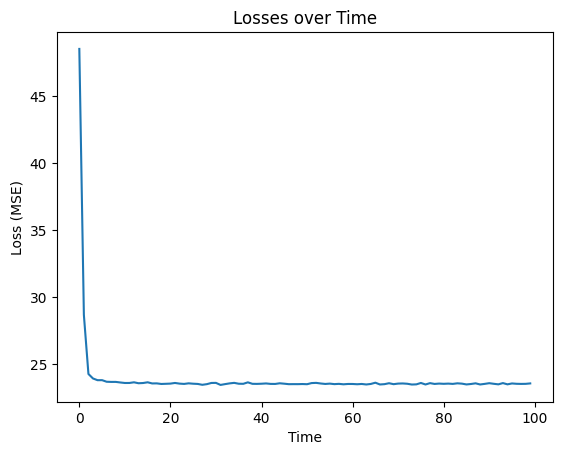

In [126]:
plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

**Conclusion**

Above we can clearly see the Error converging. This is good but it's only happening because the model is learning to constantly guess the number one. This lack of generalization is a key flaw of the model unfortunanetly. However as demonstrated by the previously poor regression results, I believe that the flaws were less atributable to our specific model and more a consequence of the poor data which didn't demonstrate a high R^2 value with the variables that we were investigating.

# Overall Conclusions

Hospital statistics are complicated. With the number of regulations and standardizations regarding the quality and format of information hospitals must report, and due to privacy laws and other legal complications, datasets regarding the medical field, including hospital data, are very limited in nature and not very comprehensive. This makes statistical analysis and machine learning with these datasets a difficult task. We certainly experienced this in our analysis; our machine learning models especially were somewhat subpar and either overfit/underfit the data due to the lack of **quality** data that was present (even though in sheer numbers it was a lot, the data was not useful to us in our analysis).

Specifically, we noticed that data in some counties (often times rural, low-populated ones) of California was very limited, while data in other counties (more popular ones like Los Angeles) were much more prevalent. This led to an overrepresentation of the features in those populous areas, and thus our models would overfit to those specific features, leading to a lack of generalization.

Regardless, throughout this tutorial we have noticed some important results:
- Procedures regarding heart failure are a significant cause of mortality rates driven by hospitals
- The location of a hospital in a specific county somewhat affects its performance measures, including mortality rate
  - But non-location based statistics such as number of cases had a much bigger impact on the measures
- Performance measures don't seem to show a reliable trend over time, varying too significantly between hospital

We hope that, in the future, more *useful* data regarding hospital performance measures can be integrated into our topic so that our analysis is more conclusive.
